# **Experiment C1**: full algorithm of concent from smudged ground truth

Vary noise level and number of images

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM

[Errno 2] No such file or directory: '/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM'
/Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/projects/lifting_v2/experiments/experimentA1


In [ ]:
# install libraries in Colab env
!pip install mrcfile
!pip install aspire
!pip install quaternionic
!pip install pykeops[colab] > install.log

     |████████████████████████████████| 186 kB 11.5 MB/s 
     |████████████████████████████████| 2.2 MB 47.6 MB/s 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/r

In [2]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC1.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC1.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.


In [15]:
# Experiment parameters
vol_smudge = 5
img_size = 129  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 1 # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 2048  # [512, 1024, 2048, 4096]
k = 90
kernel_radius = np.pi/k  # radius of kernel
volume_reg_param = 1e10
rots_density_reg_param_init = 5 * snr * (img_size/65)**2 # was 10
rots_density_reg_param_inf = rots_density_reg_param_init / (1 - np.exp(- img_size/500))  # was 1000 -> Back to 1000 in NEXT TRY
# rots_density_reg_param_init = 10 * snr * (1 - np.exp(- img_size/30))  # was 10
# rots_density_reg_param_inf = 500 * snr * (1 - np.exp(- img_size/30))
rots_density_reg_param_rate = np.log(num_imgs)*snr/(2*np.log(img_size))   # * np.exp(- img_size/1000) instead of the log(L) term TRY THIS NEXT
rots_batch_size = 8192

max_iter = 2

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC1" , postfix="SNR{}_L{}_N{}_r{}_k{}_lamV{}_lamD{}-{}-{}_i{}".format(int(1/snr),img_size,num_imgs,mr_repeat,k,int(np.log(volume_reg_param)/np.log(10)), int(rots_density_reg_param_init), int(rots_density_reg_param_inf), int(1/rots_density_reg_param_rate), max_iter))
exp.dbglevel(4)

2021-12-17 16:40:39,347 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC1_21-12-17_16-40-39_SNR16_L129_N2048_r1_k90_lamV10_lamD1-5-20_i2


In [16]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/expA2_21-10-10_12-30-19_L65_N512_r1_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_12-34-53_L65_N512_r2_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_13-08-24_L65_N512_r1_k90_lamV10_lamD-10"
# results_folder = "results/expA2_21-10-10_13-47-27_L65_N512_r2_k90_lamV10_lamD-10"  # "results/lifting_21-04-26_12-22-06"

In [17]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               vol_smudge=vol_smudge,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               max_iter=max_iter,
               kernel_radius=kernel_radius,
               mr_repeat=mr_repeat,
               volume_reg_param=volume_reg_param,
               rots_coeffs_reg_param=(rots_density_reg_param_init,rots_density_reg_param_inf),
               rots_coeffs_reg_param_rate=rots_density_reg_param_rate,
               data_path=data_path
               )

2021-12-17 16:40:39,897 INFO Start Experiment
2021-12-17 16:40:39,898 INFO Running Experiment for SNR = 0.0625 and 2048 images
2021-12-17 16:40:39,900 INFO This experiment illustrates orientation refinement using a lifting approach
2021-12-17 16:40:39,901 INFO Initialize simulation object and CTF filters.
2021-12-17 16:40:39,906 INFO Load 3D map and downsample 3D map to desired grids of 129 x 129 x 129.
2021-12-17 16:40:40,768 INFO Use downsampled map to creat simulation object.
2021-12-17 16:40:40,841 INFO Get true rotation angles generated randomly by the simulation object.
2021-12-17 16:41:05,997 INFO Applying forward transformations in pipeline
2021-12-17 16:41:05,998 INFO All forward transformations applied
2021-12-17 16:41:05,999 INFO Loaded 2048 images
sigma^2 = 3.613172767516329e-10
2021-12-17 16:41:31,022 INFO Applying forward transformations in pipeline
2021-12-17 16:41:31,023 INFO All forward transformations applied
2021-12-17 16:41:31,024 INFO Loaded 2048 images
2021-12-17 

2021-12-17 17:02:37,326 INFO Start Postprocessing
2021-12-17 17:02:37,328 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 0.99993896484375
integrated (averaged) density = 1.000030517578125
2021-12-17 17:02:38,742 INFO MSE deviation of the estimated initial rotations using register_rotations : 0.0194919508363068
2021-12-17 17:02:38,784 INFO MSE deviation of the estimated GD-refined rotations using register_rotations : 0.008718430146939165


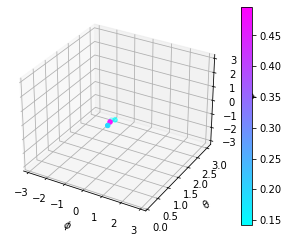

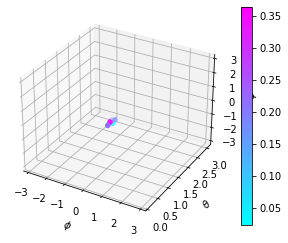

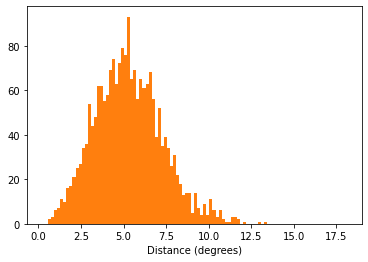

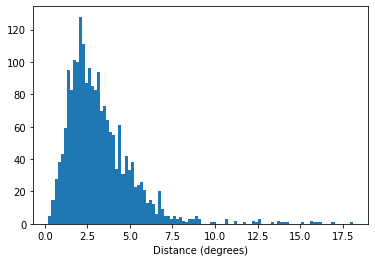

In [18]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
               # num_imgs=num_imgs,
               # snr=snr,
              #  results_folder=results_folder #?
               )
